In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers, datasets
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the data
data_Train = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Group_Project_Data/Train",
    image_size=(64, 64),
    color_mode="grayscale"
)

Found 6000 files belonging to 2 classes.


In [ ]:
# loading the data
data_Valid = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Group_Project_Data/Valid",
    image_size=(64, 64),
    color_mode="grayscale"
)

Found 2000 files belonging to 2 classes.


In [ ]:
# scaling the data
data_Train = data_Train.map(lambda x,y: (x/255, y))

In [ ]:
data_Valid = data_Valid.map(lambda x,y: (x/255, y))

In [ ]:
train_size = int(len(data_Train))
val_size = int(len(data_Valid))

In [ ]:
train = data_Train.take(train_size)
val = data_Valid.take(val_size)

In [ ]:
image_model = tf.keras.Sequential([
    layers.Conv2D(32, 3, activation="relu", padding="same", input_shape=(64, 64, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
image_model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
image_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",  # Stop training when validation loss does not improve
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore the best model weights when training stops
)

In [ ]:
history = image_model.fit(
    train, 
    epochs=10,
    validation_data=val,
    callbacks=[early_stopping],
)

Epoch 1/10
188/188 [==============================] - 455s 2s/step - loss: 0.0917 - accuracy: 0.9592 - val_loss: 0.0177 - val_accuracy: 0.9925
Epoch 2/10
188/188 [==============================] - 5s 26ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0046 - val_accuracy: 0.9980
Epoch 3/10
188/188 [==============================] - 5s 27ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9990
Epoch 4/10
188/188 [==============================] - 5s 26ms/step - loss: 0.0427 - accuracy: 0.9872 - val_loss: 0.0052 - val_accuracy: 0.9975
Epoch 5/10
188/188 [==============================] - 6s 29ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0035 - val_accuracy: 0.9990
Epoch 6/10
188/188 [==============================] - 5s 26ms/step - loss: 5.4152e-04 - accuracy: 0.9998 - val_loss: 0.0041 - val_accuracy: 0.9985
Epoch 7/10
188/188 [==============================] - 5s 27ms/step - loss: 7.7533e-04 - accuracy: 0.9997 - val_loss: 0.0030 - val_accuracy

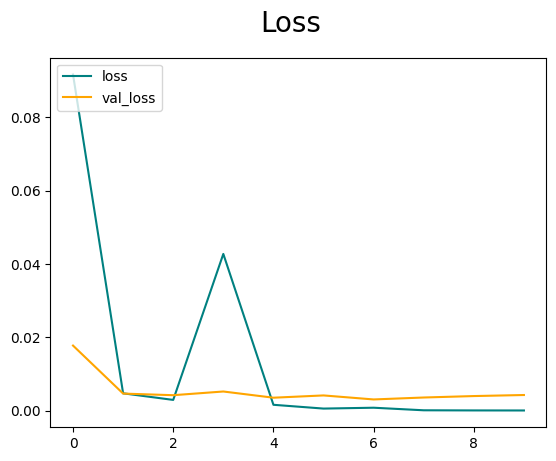

In [ ]:
#plotting the loss
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

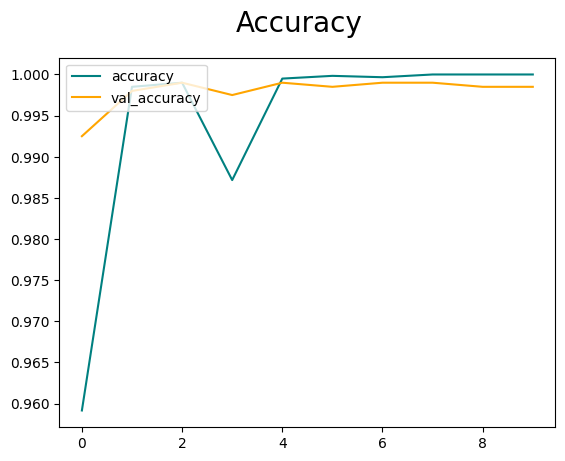

In [ ]:
#plotting the accuracy
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()